
# Raw Housing Prices 

* Importing libraries and dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing dataset
data = pd.read_csv("Raw_Housing_Prices.csv")

* Displaying the head of the dataset

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


Here the __'sale price'__ is our target variable

* Finding out the not-null count and datatypes of all the variables in our dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

### Getting to know our target variable

In [5]:
#displaying first 10 entries of sale price
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

Looking at the top 10 values of Sale Price we see that the 6th value is much larger than other variables so it can be an outlier

In [6]:
#displaying last 10 entries of sale price
data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

Looking at the last 10 entries of sale price we can see that 7th last value is exceptionally high than other values so it can be an outlier.

In [7]:
# Descriptive Statistics of Target variable 
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

After observing the different statistics of our target variable we can draw some conclusions:-
* Sale Price contains some missing values.
* There is a huge difference between mean and the median -> data is not uniformly distributed.
* There are some outliers present in our target variable.

### Outlier Treatment

<AxesSubplot:xlabel='Sale Price'>

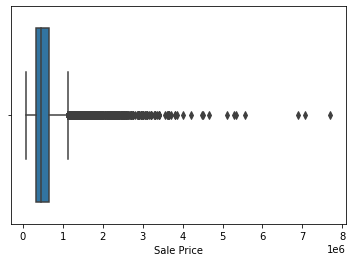

In [8]:
#graphical observation of outlier
import seaborn as sns
sns.boxplot(x = data['Sale Price'])

The points after the maximum line are the outliers

* Removing Outliers by crapping

In [9]:
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
iqr = q3 - q1 
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [10]:
# function for adjusting the outliers
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

<AxesSubplot:xlabel='Sale Price'>

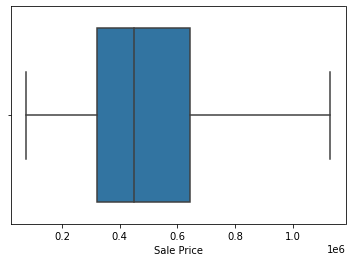

In [11]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)
sns.boxplot(x = data['Sale Price'])

Now from the above box plot we see that all the outliers have been treated.

### Dealing with NULL values

* We now remove the row containing  NULL values in our target variable i.e Sale Price

In [12]:
data.dropna(inplace = True, axis = 0, subset =['Sale Price'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

* Analysing Sale price using Histogram

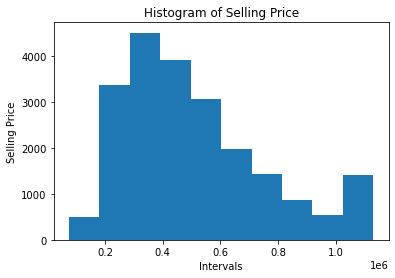

In [13]:
plt.hist(data['Sale Price'], bins = 10)
plt.xlabel("Intervals")
plt.ylabel("Selling Price")
plt.title("Histogram of Selling Price")
plt.show()

We see that that sale price is not uniformily distributed

### Dealing with missing values in Independent numerical values
Numerical values present in the raw housing data are:- 'No of Bedrooms', 'No of Bathroom', 'Flat Area', 'Lot Area', 'No of Floors', 'Overall Grade', 'Area of the House from Basement', 'Basement Area (in sqft), 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation', 'Lot Area after Renovation'.

In [14]:
# storing all the columns names in a list
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 
                     'Area of the House from Basement (in Sqft)', 'Latitude','Longitude',
                     'Living Area after Renovation (in Sqft)']

In [15]:
#dealing with NULL values using median 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

Now all the columns has been updated to 21609 except Zipcode.

In [17]:
data['Zipcode'].shape

(21609,)

We see that Zipcode is a 1-D array so it needs to be converted to 2-D array

In [18]:
#changing the shape of Zipcode to 2-dimention
column = data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

Now Zipcode has 2 dimentional shape so we can apply imputer.fit_transform() function to it

In [19]:
# this time we replace the missing value by most frequent occured value
imputer = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

We have successfully dealt with the the missing independent Numerical columns

Now we convert Zipcode to catagorical variable so that
* The sale price in each Zipcode can be analysed
* Variations across Zipcodes can be seen

In [21]:
#changing data-type of Zipcode from float to object
data['Zipcode'] = data['Zipcode'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

##### Re-coding 'Number of times visited'

In [22]:
#finding unique variables
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [23]:
# mapping the data
mapping = {'None': 0,'Once': 1,'Twice': 2,'Thrice': 3,'Four': 4}
data['No of Times Visited'] = data['No of Times Visited'].map(mapping)

In [24]:
data['No of Times Visited'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: No of Times Visited, dtype: int64

Now we have coded the number of times visited so that we can analyse the data properly.

#### Deriving 2 new variables from 'Renovated Year'

We can derive two variables from from 'Renovated Year':
* Ever Renovated -> Assign 'Yes' wherever the variable 'Renovated Year; has a non zero value and 'No' whenever the variable 'Renovated Year' is zero.

* Year Since Renovation = Year of Sale - Year of Renovation

In [25]:
#Ever Renovated
data['Ever Renovated'] = np.where(data['Renovated Year'] == 0, 'No', 'Yes')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178,47.5112,-122.257,1340.0,5650,No
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028,47.7379,-122.233,2720.0,8062,No
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136,47.5208,-122.393,1360.0,5000,No
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074,47.6168,-122.045,1800.0,7503,No


In [26]:
#year since renovation
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year
data['Year Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes', abs(data['Purchase Year'] - data['Renovated Year']),0)
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Year Since Renovation
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074,47.6168,-122.045,1800.0,7503,No,2016,0


In [27]:
# removing the variables that are not required
data.drop(columns = ['Purchase Year','Date House was Sold','Renovated Year'],inplace = True)
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


We have inserted new columns and removed unnecessary colums so that we can analyse the data in a better way.

### Dealing with Catagorical variables
We will deal with columns with object data type i.e - 'ID', 'Condition of the House', 'Waterfront View', 'Ever Renovated' and 'Zipcode'.

As ID is unique identification for each row and is not required in our analysis hence it can be droped.

In [28]:
# droping ID column
data.drop(columns = 'ID', inplace = True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

ID has been removed

* __Condition of The House__

In [30]:
data['Condition of the House'].head()

0         Fair
1         Fair
2         Fair
3    Excellent
4         Fair
Name: Condition of the House, dtype: object

In [31]:
# counting the values of each condition
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<AxesSubplot:xlabel='Condition of the House'>

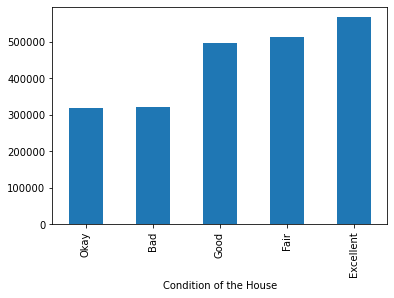

In [32]:
#plotting bar chart between Condition of the House and mean Sale Price for better analysis 
data.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind = 'bar')

We see that most of the houses are in Excellent condition.

* __Waterfront View__

In [33]:
data['Waterfront View'].head()

0    No
1    No
2    No
3    No
4    No
Name: Waterfront View, dtype: object

In [34]:
data['Waterfront View'].value_counts()

No     21446
Yes      163
Name: Waterfront View, dtype: int64

<AxesSubplot:xlabel='Waterfront View'>

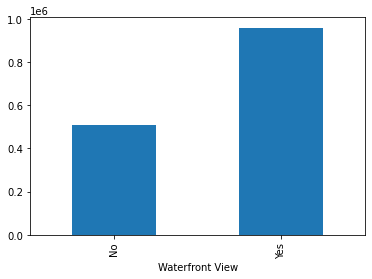

In [35]:
# plotting bar chart bwtween Waterfront View and mean sale price fro better analysis
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')

We see that majority houses have Waterfront View.

* __Ever Renovated__

In [36]:
data['Ever Renovated'].head()

0     No
1    Yes
2     No
3     No
4     No
Name: Ever Renovated, dtype: object

In [37]:
data['Ever Renovated'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Ever Renovated'>

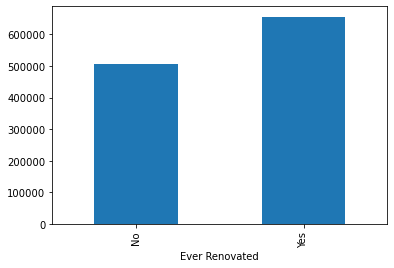

In [38]:
# plotting bar chart between ever renovated and mean sale price
data.groupby('Ever Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

We see that the renovated house has slightly higher mean sale price than that of those not renovated.

* __Zipcode__

In [39]:
data['Zipcode'].head()

0    98178
1    98125
2    98028
3    98136
4    98074
Name: Zipcode, dtype: object

In [40]:
data['Zipcode'].unique()

array([98178.0, 98125.0, 98028.0, 98136.0, 98074.0, 98053.0, 98003.0,
       98198.0, 98146.0, 98038.0, 98007.0, 98115.0, 98107.0, 98126.0,
       98019.0, 98103.0, 98002.0, 98133.0, 98040.0, 98092.0, 98030.0,
       98119.0, 98112.0, 98052.0, 98027.0, 98117.0, 98058.0, 98001.0,
       98056.0, 98166.0, 98023.0, 98070.0, 98148.0, 98105.0, 98042.0,
       98008.0, 98059.0, 98122.0, 98144.0, 98004.0, 98005.0, 98034.0,
       98075.0, 98116.0, 98010.0, 98118.0, 98199.0, 98032.0, 98045.0,
       98102.0, 98077.0, 98108.0, 98168.0, 98177.0, 98065.0, 98029.0,
       98006.0, 98109.0, 98022.0, 98033.0, 98155.0, 98024.0, 98011.0,
       98031.0, 98106.0, 98072.0, 98188.0, 98014.0, 98055.0, 98039.0],
      dtype=object)

<AxesSubplot:xlabel='Zipcode'>

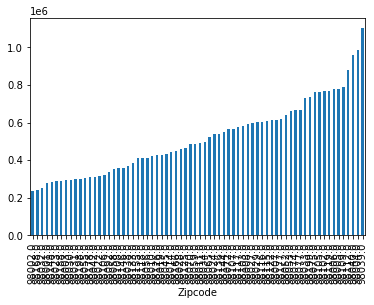

In [41]:
#plotting bar chart between zipcode and mean sale price for better visualization
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind = 'bar')

We can analyse from the above graph, the relation between Avg Sale Price and ZipCode

#### Catagorical Variable Analysis using ANOVA
First we need to transform the column name with spaces between words.

In [42]:
#importing required libraries
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [43]:
data = data.rename(columns = {'Sale Price': 'Sale_Price'})
data = data.rename(columns = {'Condition of the House': 'Condition_of_the_House'})
data = data.rename(columns = {'Waterfront View': 'Waterfront_View'})
data = data.rename(columns = {'Ever Renovated' : 'Ever_Renovated'})

In [44]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074,47.6168,-122.045,1800.0,7503,No,0


We renamed all the categorical variables using underscore so that we can use it as constant in python

__Anova__

In [45]:
# relation between condition of the house and sale price
mod = ols('Sale_Price ~ Condition_of_the_House', data = data).fit()
sm.stats.anova_lm(mod,type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
Condition_of_the_House,4.0,1.441831e+13,3.604579e+12,58.25563,5.447605e-49
Residual,21604.0,1.336752e+15,6.187520e+10,NaN,NaN


In [46]:
# Relation between Waterfront view and Sale Price
mod = ols('Sale_Price ~ Waterfront_View',data = data).fit()
sm.stats.anova_lm(mod,type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
Waterfront_View,1.0,3.283737e+13,3.283737e+13,538.192683,1.275558e-117
Residual,21607.0,1.318333e+15,6.101415e+10,NaN,NaN


In [47]:
# Relation between Ever Renovated and Sale price
mod = ols('Sale_Price ~ Ever_Renovated',data = data).fit()
sm.stats.anova_lm(mod,type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
Ever_Renovated,1.0,1.998463e+13,1.998463e+13,324.378469,5.419055e-72
Residual,21607.0,1.331185e+15,6.160899e+10,NaN,NaN


In [48]:
# Relation between Zipcode and Sale Price
mod = ols('Sale_Price ~ Zipcode',data = data).fit()
sm.stats.anova_lm(mod,type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
Zipcode,69.0,6.859657e+14,9.941532e+12,321.902033,0.0
Residual,21539.0,6.652044e+14,3.088372e+10,NaN,NaN


###### Conclusion:-
The PR values < 0.05 thus these catagorical variables seems to have impact on the target variable and should be included in our model.

#### Creation of Dummy Variable

In [49]:
data = pd.get_dummies(data,columns = ['Condition_of_the_House','Waterfront_View','Ever_Renovated'],drop_first = True)
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,-122.319,1690.0,7639,26,0,1,0,0,0,1
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


#### Binning Zipcode
We will Bin Zipcode as the number of levels are very high in case of ZipCode.

In [50]:
# creating a new table 
Zip_Table = data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending = True)
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [51]:
# creating groups based on bins
Zip_Table['Zipcode_Group'] = pd.cut(Zip_Table['Sale_Price'],bins = 9, 
                                    labels = ['Zipcode_Group_0', 'Zipcode_Group_1',
                                              'Zipcode_Group_2', 'Zipcode_Group_3',
                                              'Zipcode_Group_4', 'Zipcode_Group_5', 
                                               'Zipcode_Group_6', 'Zipcode_Group_7'
                                               'Zipcode_Group_8', 'Zipcode_Group_9'],
                                   include_lowest = True)

#dropping Sale Price from Zip_Table
Zip_Table = Zip_Table.drop(columns = 'Sale_Price')

#merging the Zip_Table and data
data = pd.merge(data,Zip_Table,left_on = 'Zipcode',how = 'left',right_index = True)

#removing the Zipcode column from data
data = data.drop(columns = 'Zipcode')

#displaying data
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1690.0,7639,26,0,1,0,0,0,1,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,2720.0,8062,0,0,1,0,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1360.0,5000,0,1,0,0,0,0,0,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,1800.0,7503,0,0,1,0,0,0,0,Zipcode_Group_4


Each entry now has been assigned with a Zipcode group. Now we need to create dummy variables based on this group.

In [52]:
# creating dummy variables for zipcode
data = pd.get_dummies(data,columns = ['Zipcode_Group'],drop_first = True)
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,1,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,0,1,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,0,1,0,0,0,0


### Scaling the Dataset

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.210155,-0.503266,-0.371207,-0.570421,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,4.758385,-0.503266,2.693913,-0.570421,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.210155,-0.503266,2.693913,-0.570421,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.210155,-0.503266,-0.371207,1.753091,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.210155,-0.503266,-0.371207,-0.570421,3.515022,-0.353553,-0.112274,-0.16885,-0.048158


### Checking and Removing Multi-collinearity

In [54]:
# finding out the pairs having correlation > 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)] 
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

There are 16 unique pairs with correlation > 0.5

* Removing multi-collinearity using VIF

In [55]:
#Importing variance_inflation_factor function from Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X

# Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                     1.641383
No of Bathrooms                                    3.373912
Flat Area (in Sqft)                             1481.944415
Lot Area (in Sqft)                                 2.107540
No of Floors                                       2.160467
No of Times Visited                                1.433786
Overall Grade                                      2.954516
Area of the House from Basement (in Sqft)       1205.907068
Basement Area (in Sqft)                          345.500680
Age of House (in Years)                            2.654534
Latitude                                           2.392121
Longitude                                          1.713568
Living Area after Renovation (in Sqft)             3.072215
Lot Area after Renovation (in Sqft)                2.142854
Year Since Renovation                              2.787534
Condition_of_the_House_Excellent                  53.574546
Condition_of_the_House_Fair             

We find out that there are 7 variables with VIF > 5.

In [56]:
# variable with Maximum VIF
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [57]:
# Multicolliearity remover function
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [58]:
# Removing Multi-collinearity
for i in range(7):   
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.210155,-0.503266,-0.371207,-0.570421,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,4.758385,-0.503266,2.693913,-0.570421,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.210155,-0.503266,2.693913,-0.570421,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.210155,-0.503266,-0.371207,1.753091,-0.284493,-0.353553,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.210155,-0.503266,-0.371207,-0.570421,3.515022,-0.353553,-0.112274,-0.16885,-0.048158


In [59]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                                  1.640925
 No of Bathrooms                                 3.372791
 Lot Area (in Sqft)                              2.106970
 No of Floors                                    2.160403
 No of Times Visited                             1.433765
 Overall Grade                                   2.944205
 Area of the House from Basement (in Sqft)       4.582335
 Basement Area (in Sqft)                         1.982026
 Age of House (in Years)                         2.651651
 Latitude                                        2.392055
 Longitude                                       1.713545
 Living Area after Renovation (in Sqft)          3.067870
 Lot Area after Renovation (in Sqft)             2.142572
 Year Since Renovation                           2.787499
 Condition_of_the_House_Excellent                1.205594
 Condition_of_the_House_Good                     1.250721
 Condition_of_the_House_Okay                     1.025354
 Waterfront_Vi

Four columns have been removed and now all the data has VIF value less than 5 hence solving the problem of multi colinearity

### Test-Train Data Set

In [60]:
X = vif_data            # independent variables
Y = data['Sale_Price']  # dependent variables

In [61]:
# spliting the variables into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 27), (6483, 27), (15126,), (6483,))

### Linear Regression Implementation

In [62]:
# We import linear regression class from sklearn module
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = 'True')
lr.fit(x_train, y_train)

LinearRegression(normalize='True')

In [63]:
lr.coef_

array([ -3467.16935889,  12184.10915437,  14702.62794776,    221.42157661,
        27535.08702601,  60001.46681594,  81269.02831383,  27174.22237315,
        26718.89755085,  29506.73386148, -20519.24277796,  18183.41260937,
        -2917.77288933, -10257.33356363,  14407.30680915,   5349.74565233,
        -2209.65583095,  11199.70206956,  14606.68890035,  20065.09910106,
        27154.39285789,  79032.25034615,  47718.54325446,  82300.29639022,
        38990.23516453,  65182.24854372,  21363.53237175])

In [64]:
predictions = lr.predict(x_test)
predictions

array([ 523116.58364127,  640915.76537748,  616066.92279097, ...,
       1024276.40527113,  935916.90896526, 1228598.36765596])

In [65]:
# obtaining the R2 value
lr.score(x_test, y_test)

0.8474449250846113

R2 value of 0.8474 implies that 84.74% of variations in the output variable is explained by the input variable

### Residuals

In [66]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')
residual_table

,residuals,predictions
1149,-227248.004727,-1.522480e+05
19452,-189413.237675,-4.741324e+04
13716,-148778.861633,3.122114e+04
11588,-153171.786015,3.482821e+04
4203,-104482.180057,4.551782e+04
...,...,...
6508,378425.227222,1.508000e+06
9254,404132.972074,1.533708e+06
18477,439377.416294,1.568952e+06
15255,449243.134187,1.578818e+06


In [67]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

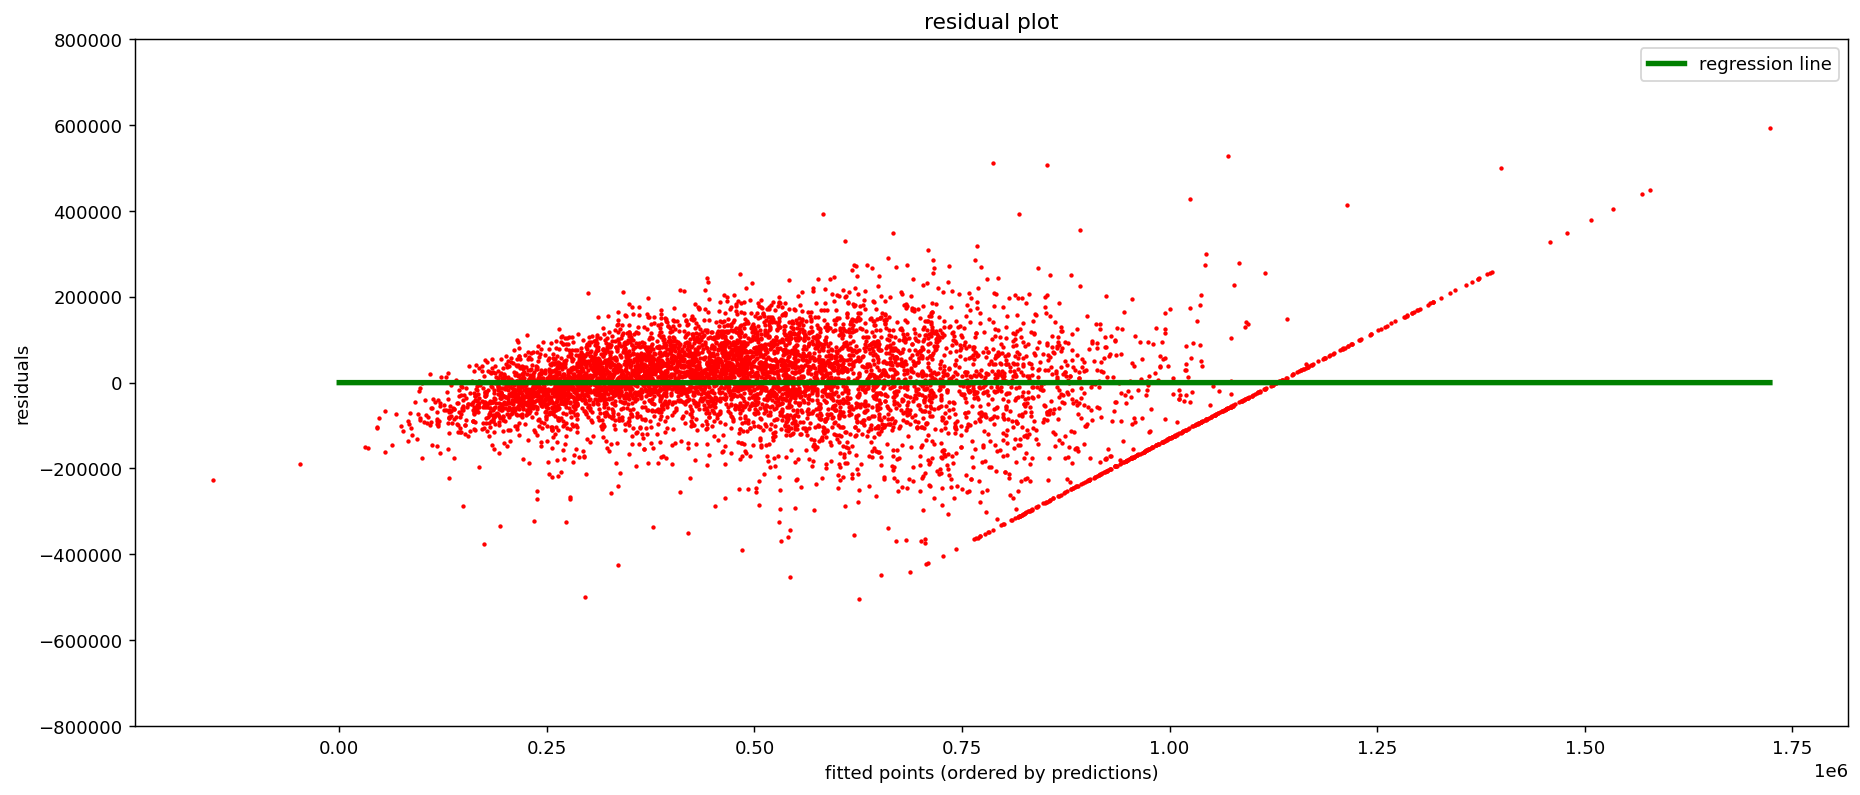

In [68]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

__Conclusions__

* The residuals are densely populated between the limits 200000 and -200000
* There is a good probability that the residuals are randomly distributed
* There are some outliers with positive magnitude

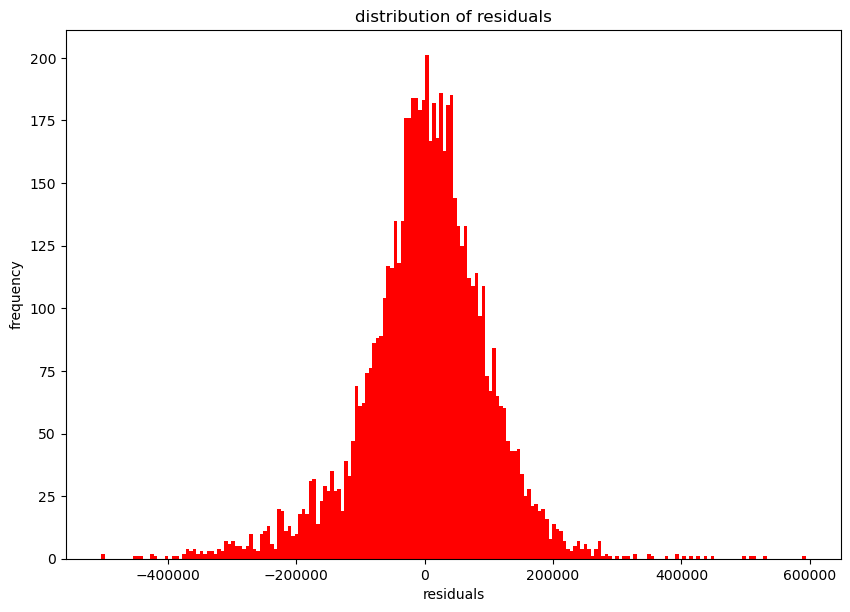

In [69]:
# residual graph
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

* The residuals follow the normal distribution
* We can also see some outliers on the far right of the graph

### Model Coefficients

In [70]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')
coefficient_table

,column,coefficients
10,Longitude,-20519.242778
13,Year Since Renovation,-10257.333564
0,No of Bedrooms,-3467.169359
12,Lot Area after Renovation (in Sqft),-2917.772889
16,Condition_of_the_House_Okay,-2209.655831
3,No of Floors,221.421577
15,Condition_of_the_House_Good,5349.745652
17,Waterfront_View_Yes,11199.702070
1,No of Bathrooms,12184.109154
14,Condition_of_the_House_Excellent,14407.306809


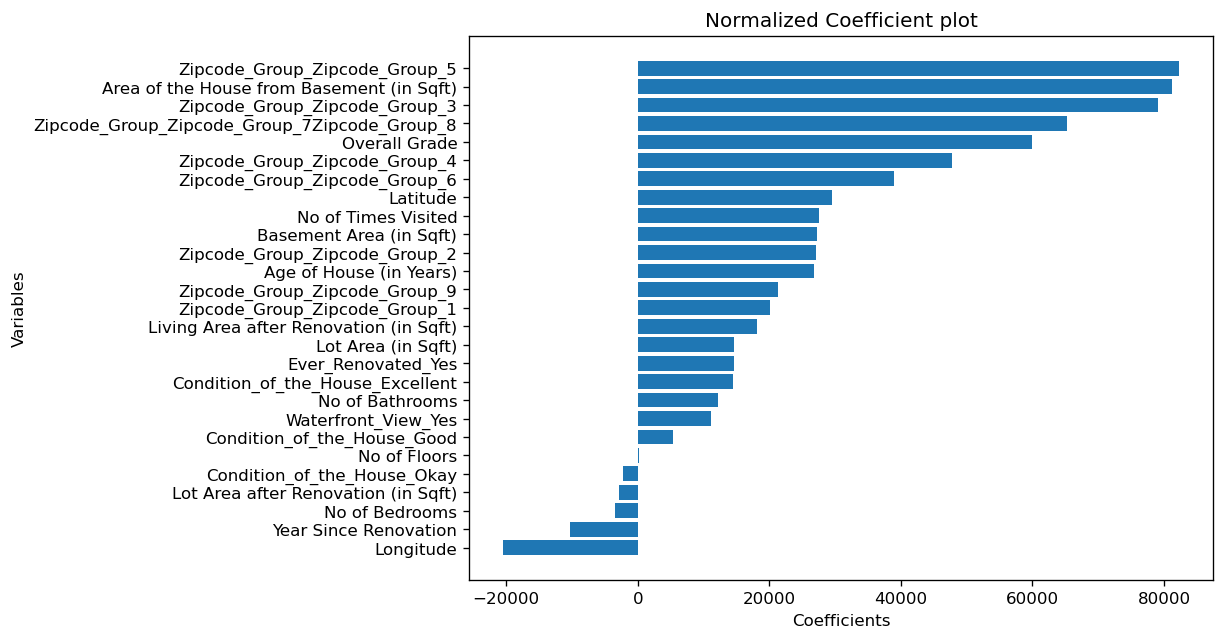

In [71]:
# plotting the graph between model corfficient and variables
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

#### Conclusions from the above graph
* The location determined by zipcode plays a significant role in 'Sale Price' of the house
* The Area of house from the basement has also played a major role in affectin the 'sale price'
* Overall Grade has also played quite significant role
* The older house are more expensive than newer house which is counter intutive.
* Variables like 'Overall Grade', 'No of times visited', 'basement area', 'waterfront view' etc has played a significant positive role in 'Sale Price
* Customers often prefer the house that are recently renovated.
* We see that Longitude has negative significance while the Latitude has positive significance.